<a href="https://colab.research.google.com/github/ram2311/Heart-disease-prediction/blob/main/heart_disease_classifications_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

## Introduction

Of all the applications of machine-learning, diagnosing any serious disease using a black box is always going to be a hard sell. If the output from a model is the particular course of treatment (potentially with side-effects), or surgery, or the *absence* of treatment, people are going to want to know **why**.

The following models will be explored:
1. Logistic regression - Manual and sklearn
2. KNN
3. SVM
4. Naïve Bayes
5. Decision Tree
6. Random Forests 

### Packages

1. `numpy`: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
2. `pandas`: it offers data structures and operations for manipulating numerical tables and time series
3. `matplotlib`: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
4. `seaborn`: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
5. `sklearn`: Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language
6. `scipy`: SciPy is a free and open-source Python library used for scientific computing and technical computing. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

## Reading Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jacobjohn2016/Kaggle-Notes/main/Heart_Disease_UCI/data/heart.csv")

In [ ]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124), ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests).

Looking at information of heart disease risk factors led me to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [3](https://www.bhf.org.uk/informationsupport/risk-factors). According to another source [4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack), the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that **thalassemia**, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the *more* major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

## Exploratory Data Analysis

### Target Variables

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

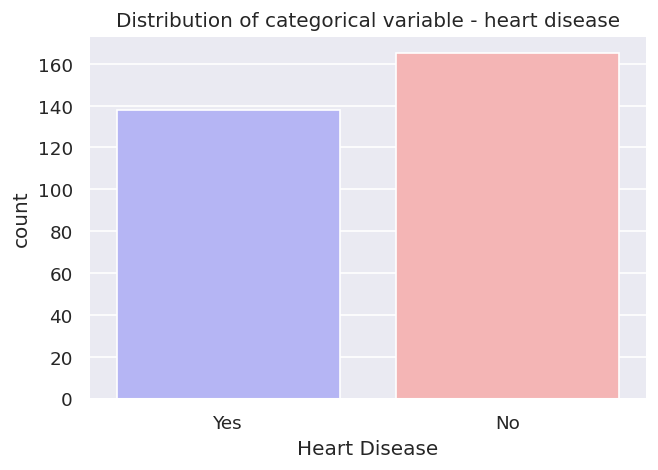

In [ ]:
# figsize = figure size, dpi = resolution
sns.set(rc={"figure.figsize": (6, 4), "figure.dpi": 120})
# creating a countplot
target_countplot = sns.countplot(x="target", data=df, palette="bwr")
target_countplot.set(xticklabels=["Yes", "No"])
plt.title("Distribution of categorical variable - heart disease")
plt.xlabel("Heart Disease")
plt.show()

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print(
    "Percentage of Patients Haven't Heart Disease: {:.2f}%".format(
        (countNoDisease / (len(df.target)) * 100)
    )
)
print(
    "Percentage of Patients Have Heart Disease: {:.2f}%".format(
        (countHaveDisease / (len(df.target)) * 100)
    )
)

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


### Count of Sex

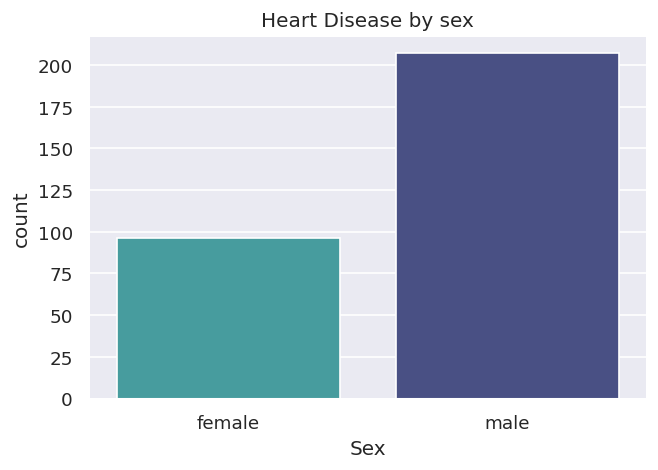

In [ ]:
sns.set(rc={"figure.figsize": (6, 4), "figure.dpi": 120})
sex_countplot = sns.countplot(x="sex", data=df, palette="mako_r")
sex_countplot.set(xticklabels=["female", "male"])
plt.xlabel("Sex")
plt.title("Heart Disease by sex")
plt.show()

In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print(
    "Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex)) * 100))
)
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex)) * 100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


### Heart Disease by Age

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


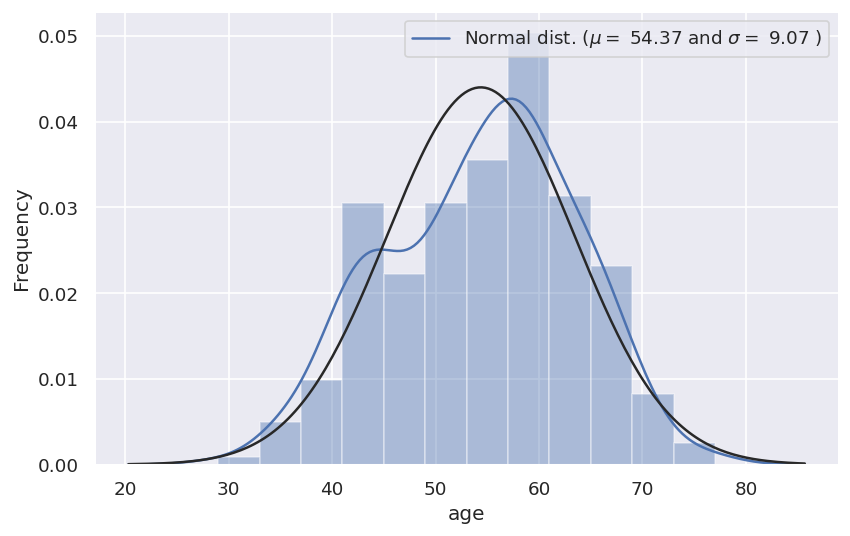

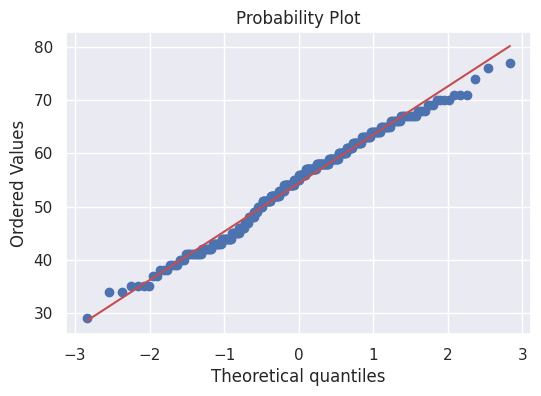

In [ ]:
plt.subplots(figsize=(8, 5))
sns.set({"figure.dpi": 100})
# creating a distribution plot fitted along a normal distribution
sns.distplot(df.age, fit=stats.norm)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(data=df.age)

# plot with the distribution
plt.legend(
    ["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best"
)
plt.ylabel("Frequency")
plt.grid(True)

# Probablity plot
fig = plt.figure(dpi=100)
stats.probplot(df.age, plot=plt)
plt.grid(True)
plt.show()

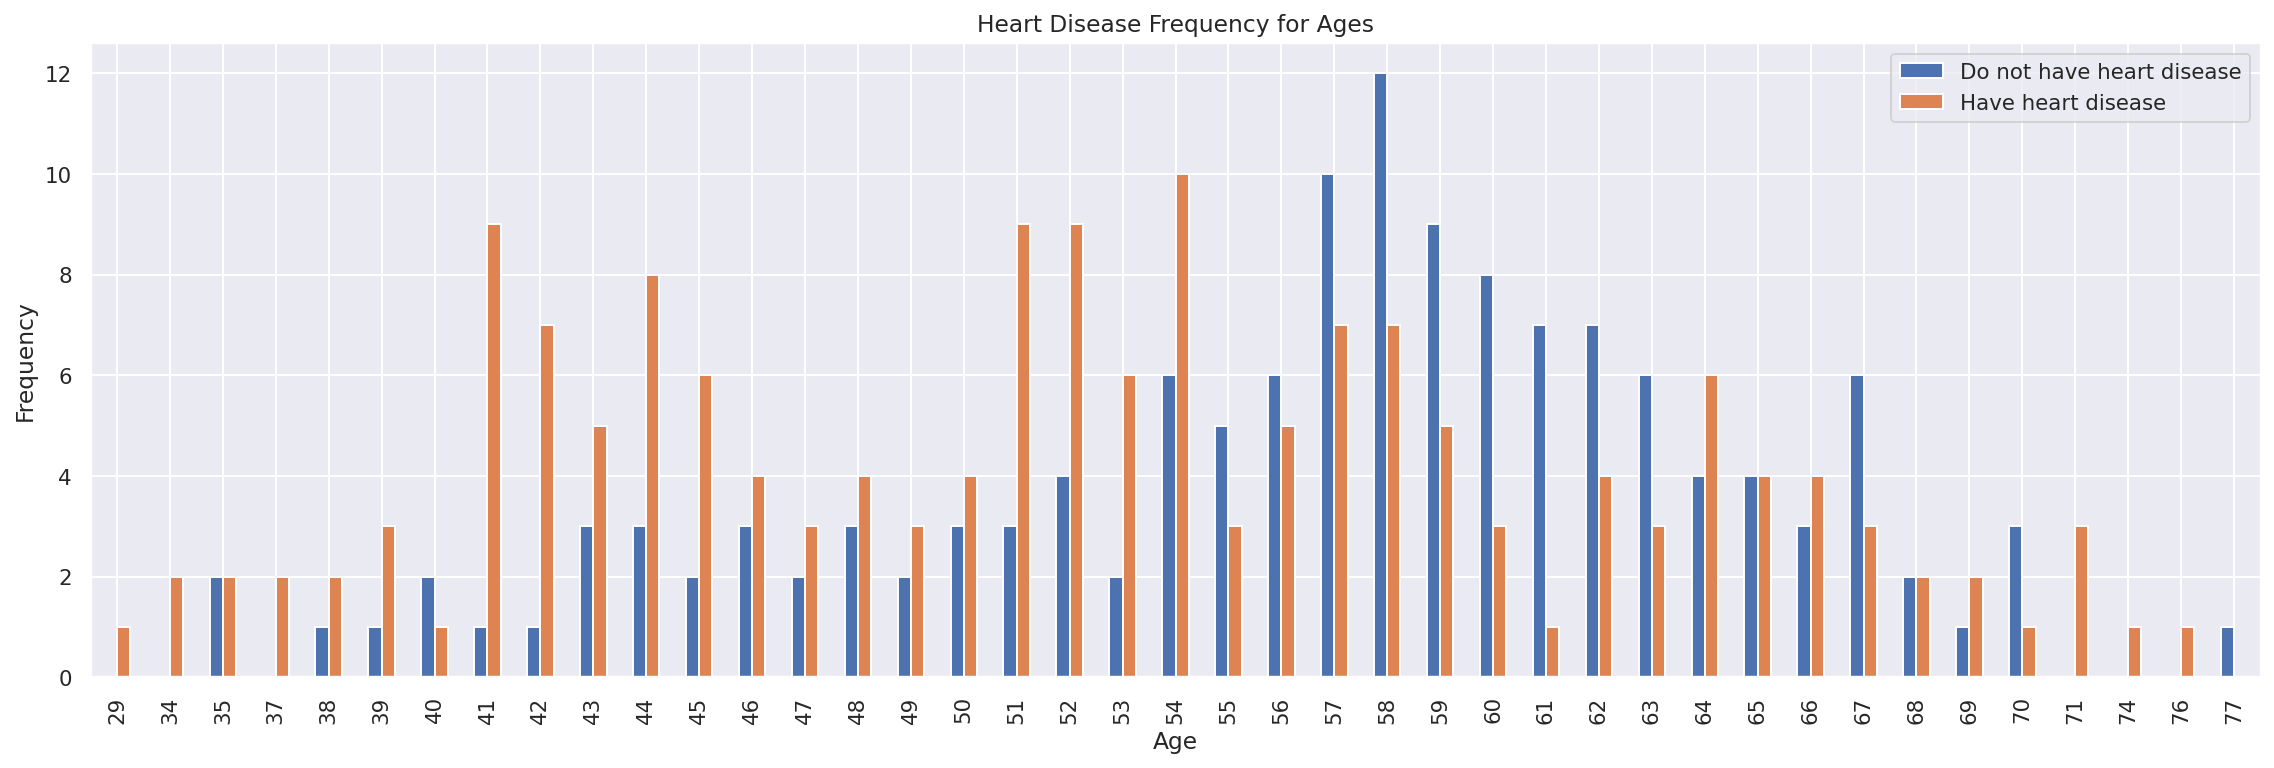

In [ ]:
plt.figure(dpi=140)
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease Frequency for Ages")
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Heart Disease by Sex

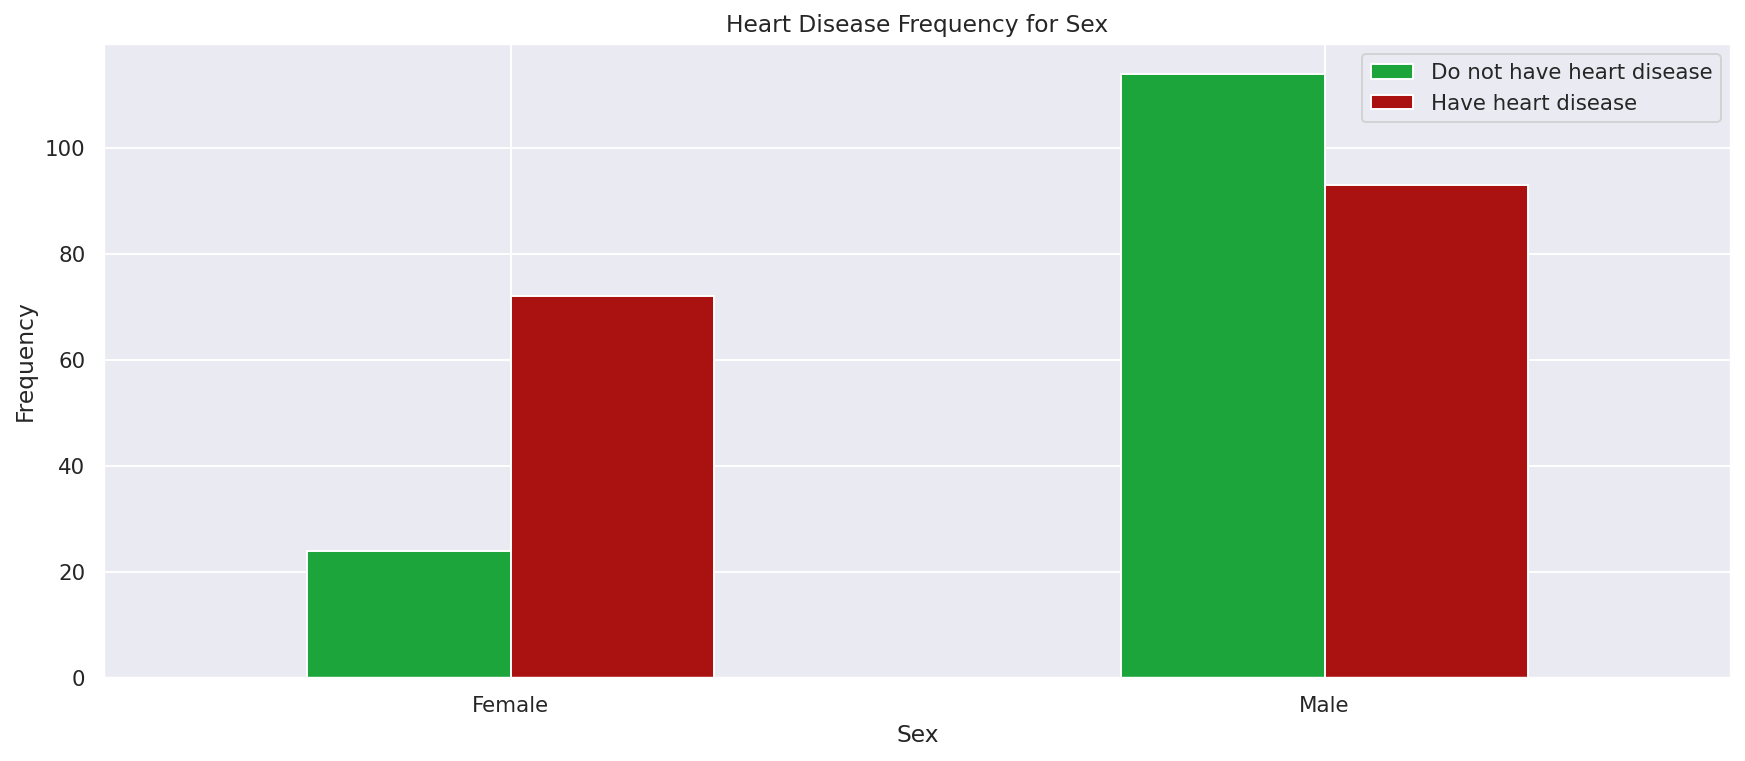

In [ ]:
#Crosstabs procedure is used to create contingency tables,frequency, which describe the interaction between two categorical variables.
plt.figure(dpi=140)
pd.crosstab(df.sex, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#1CA53B", "#AA1111"], ax=plt.gca()
)
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Sex")
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Female", "Male"])
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.ylabel("Frequency")
plt.show()

### Heart Disease by Slope

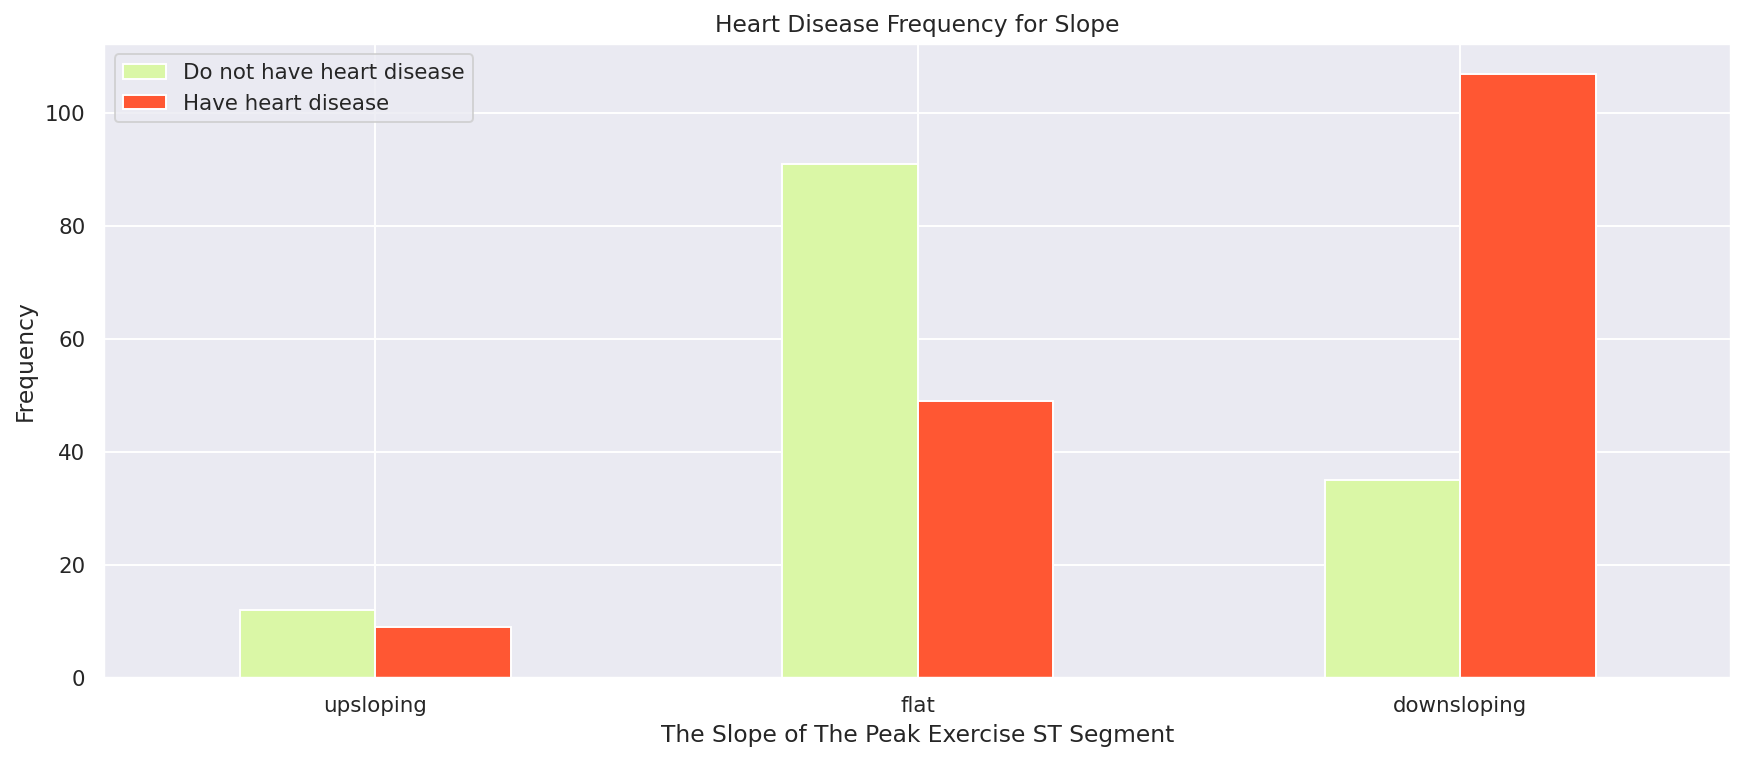

In [ ]:
plt.figure(dpi=140)
pd.crosstab(df.slope, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#DAF7A6", "#FF5733"], ax=plt.gca()
)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.title("Heart Disease Frequency for Slope")
plt.xlabel("The Slope of The Peak Exercise ST Segment")
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["upsloping", "flat", "downsloping"])
plt.ylabel("Frequency")
plt.show()

### Heart Disease by FBS

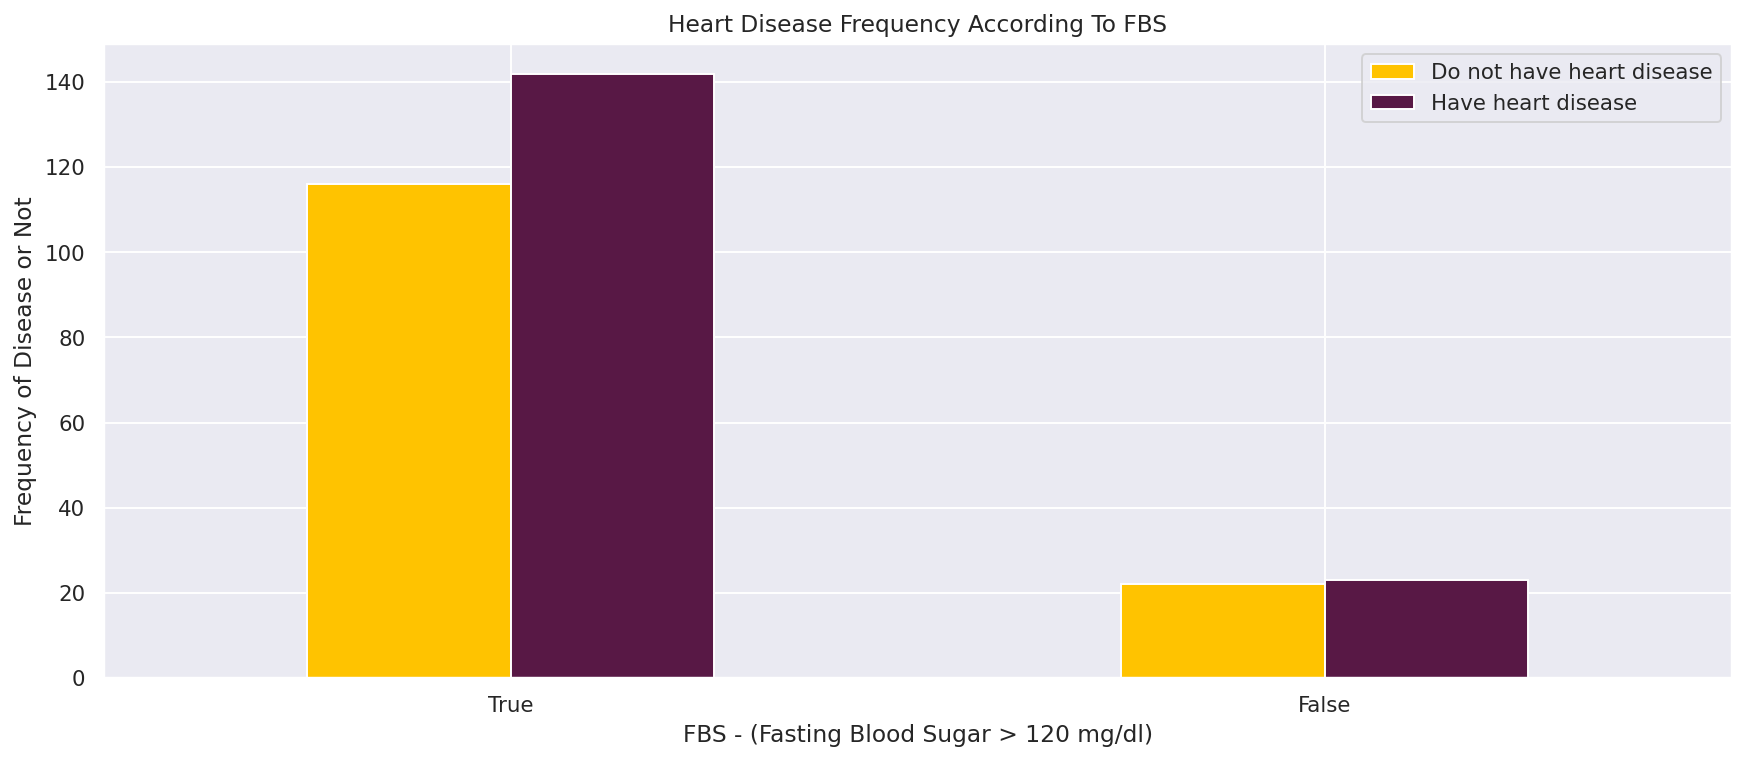

In [ ]:
plt.figure(dpi=140)
pd.crosstab(df.fbs, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#FFC300", "#581845"], ax=plt.gca()
)
plt.title("Heart Disease Frequency According To FBS")
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)")
plt.gca().set_xticklabels(labels=["True", "False"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not")
plt.show()

### Heart Disease by Chest Pain Experience

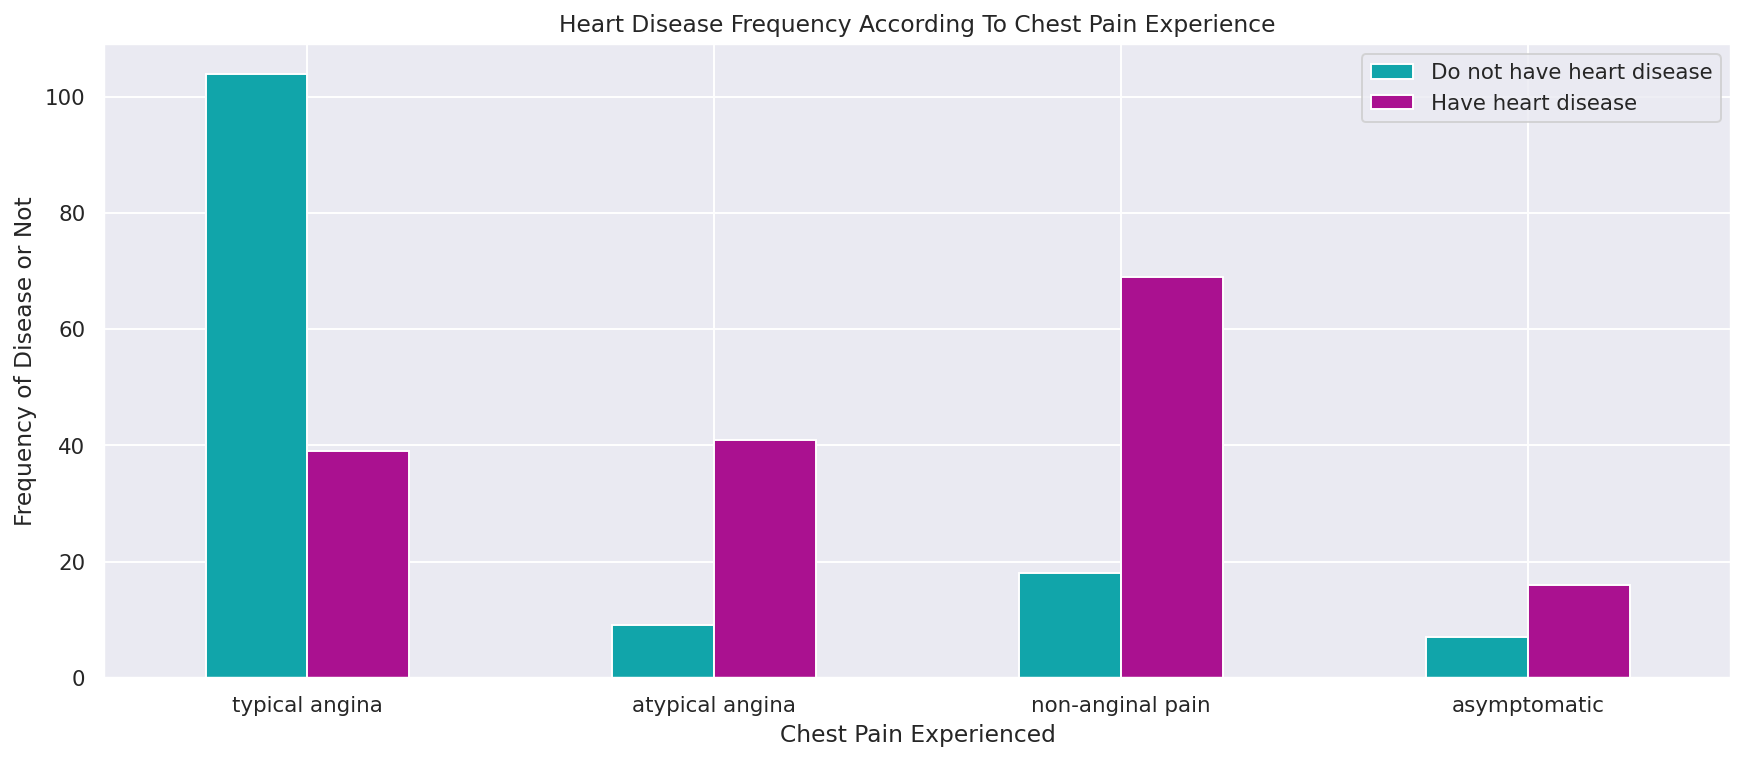

In [ ]:
plt.figure(dpi=140)
pd.crosstab(df.cp, df.target).plot(
    kind="bar", figsize=(15, 6), color=["#11A5AA", "#AA1190"], ax=plt.gca()
)
plt.title("Heart Disease Frequency According To Chest Pain Experience")
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Chest Pain Experienced")
plt.gca().set_xticklabels(
    labels=["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
)
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not")
plt.show()

### Creating Dummy Variables using One Hot Encoding

* Since `cp`, `tha` and `slope` are categorical variables we'll turn them into dummy variables.
* Categorical data are variables that contain label values rather than numeric values.
* Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.
* This means that categorical data must be converted to a numerical form. 
* In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [ ]:
a = pd.get_dummies(df["cp"], prefix="cp")
b = pd.get_dummies(df["thal"], prefix="thal")
c = pd.get_dummies(df["slope"], prefix="slope")

In [ ]:
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
df = df.drop(columns=["cp", "thal", "slope"])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


## Logistic Regression (Using Stochastic Gradient Descent)

* Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of the target or dependent variable is dichotomous, which means there would be only two possible classes.
* In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).
* Mathematically, a logistic regression model predicts $P(Y=1)$ as a function of $X$. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

In [ ]:
y = df.target.values
x_data = df.drop(["target"], axis=1)

### Normalize Data

* Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.
* A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.
* Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
* The formula is as follows:

<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>



In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Logistic Regression
Logistic regression is basically a supervised classification algorithm
Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities  

> Indented block





In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)

acc = lr.score(x_test, y_test) * 100

accuracies["Logistic Regression"] = acc
print("Logistic Regression (using Sklearn) Test Accuracy {:.2f}%".format(acc))

Logistic Regression (using Sklearn) Test Accuracy 86.89%


## K-Nearest Neighbour (KNN) Classification

The K-Nearest Neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics  
* The data is assigned to the class which has the nearest neighbors. 
* As you increase the number of nearest neighbors, the value of k, accuracy might increase.
* K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −
     - **Lazy learning algorithm** − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.
     - **Non-parametric learning algorithm** − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.


<br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} - NN Score: {:.2f}%".format(2, knn.score(x_test, y_test) * 100))

2 - NN Score: 77.05%


Now, iterating through 1-20 values of "K" and finding the one with the highest accuracy.

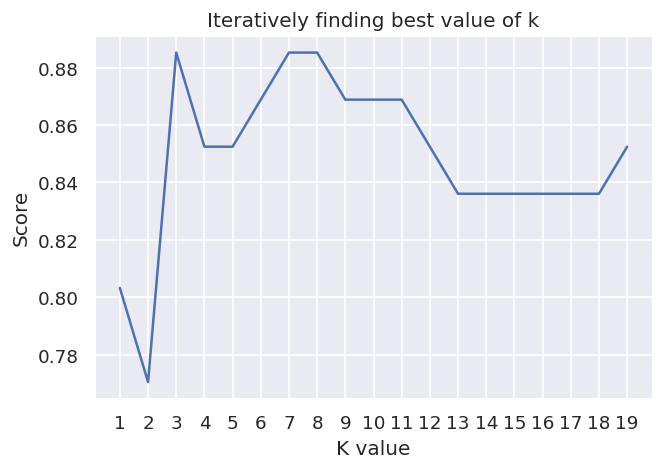

Maximum KNN Score is 88.52%


In [ ]:
# try ro find best k value
scoreList = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))

plt.figure(dpi=120)
plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.title("Iteratively finding best value of k")
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
accuracies["KNN"] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

As you can see above if we define k as 3-7-8 we will reach maximum score. <br>

## Support Vector Machine (SVM) Algorithm 

* Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. 
* But generally, they are used in classification problems. 
* In the 1960s, SVMs were first introduced but later they got refined in 1990. 
* SVMs have their unique way of implementation as compared to other machine learning algorithms. 
* Lately, they are extremely popular because of their ability to handle multiple continuous and categorical variables.

<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state=1, kernel="rbf")
svm.fit(x_train, y_train)

acc = svm.score(x_test, y_test) * 100
accuracies["SVM"] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.52%


## Naive Bayes Algorithm

* Naïve Bayes algorithms is a classification technique based on applying Bayes’ theorem with a strong assumption that all the predictors are independent to each other. 
* In simple words, the assumption is that the presence of a feature in a class is independent to the presence of any other feature in the same class. 
* For example, a phone may be considered as smart if it has a touch screen, internet facility, good camera etc. Though all these features are dependent on each other, they contribute independently to the probability that the phone is a smart phone.
* In Bayesian classification, the main interest is to find the posterior probabilities i.e. the probability of a label given some observed features, $P(L|features)$.


<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test, y_test) * 100
accuracies["Naive Bayes"] = acc
print("Accuracy of Naïve Bayes: {:.2f}%".format(acc))

Accuracy of Naïve Bayes: 86.89%


## Decision Tree Algorithm

* In general, Decision tree analysis is a predictive modelling tool that can be applied across many areas.
* Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. 
* Decisions trees are the most powerful algorithms that fall under the category of supervised algorithms.
* They can be used for both classification and regression tasks. The two main entities of a tree are decision nodes, where the data is split and leaves, where we get outcome.

<br>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test) * 100
accuracies["Decision Tree"] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 78.69%


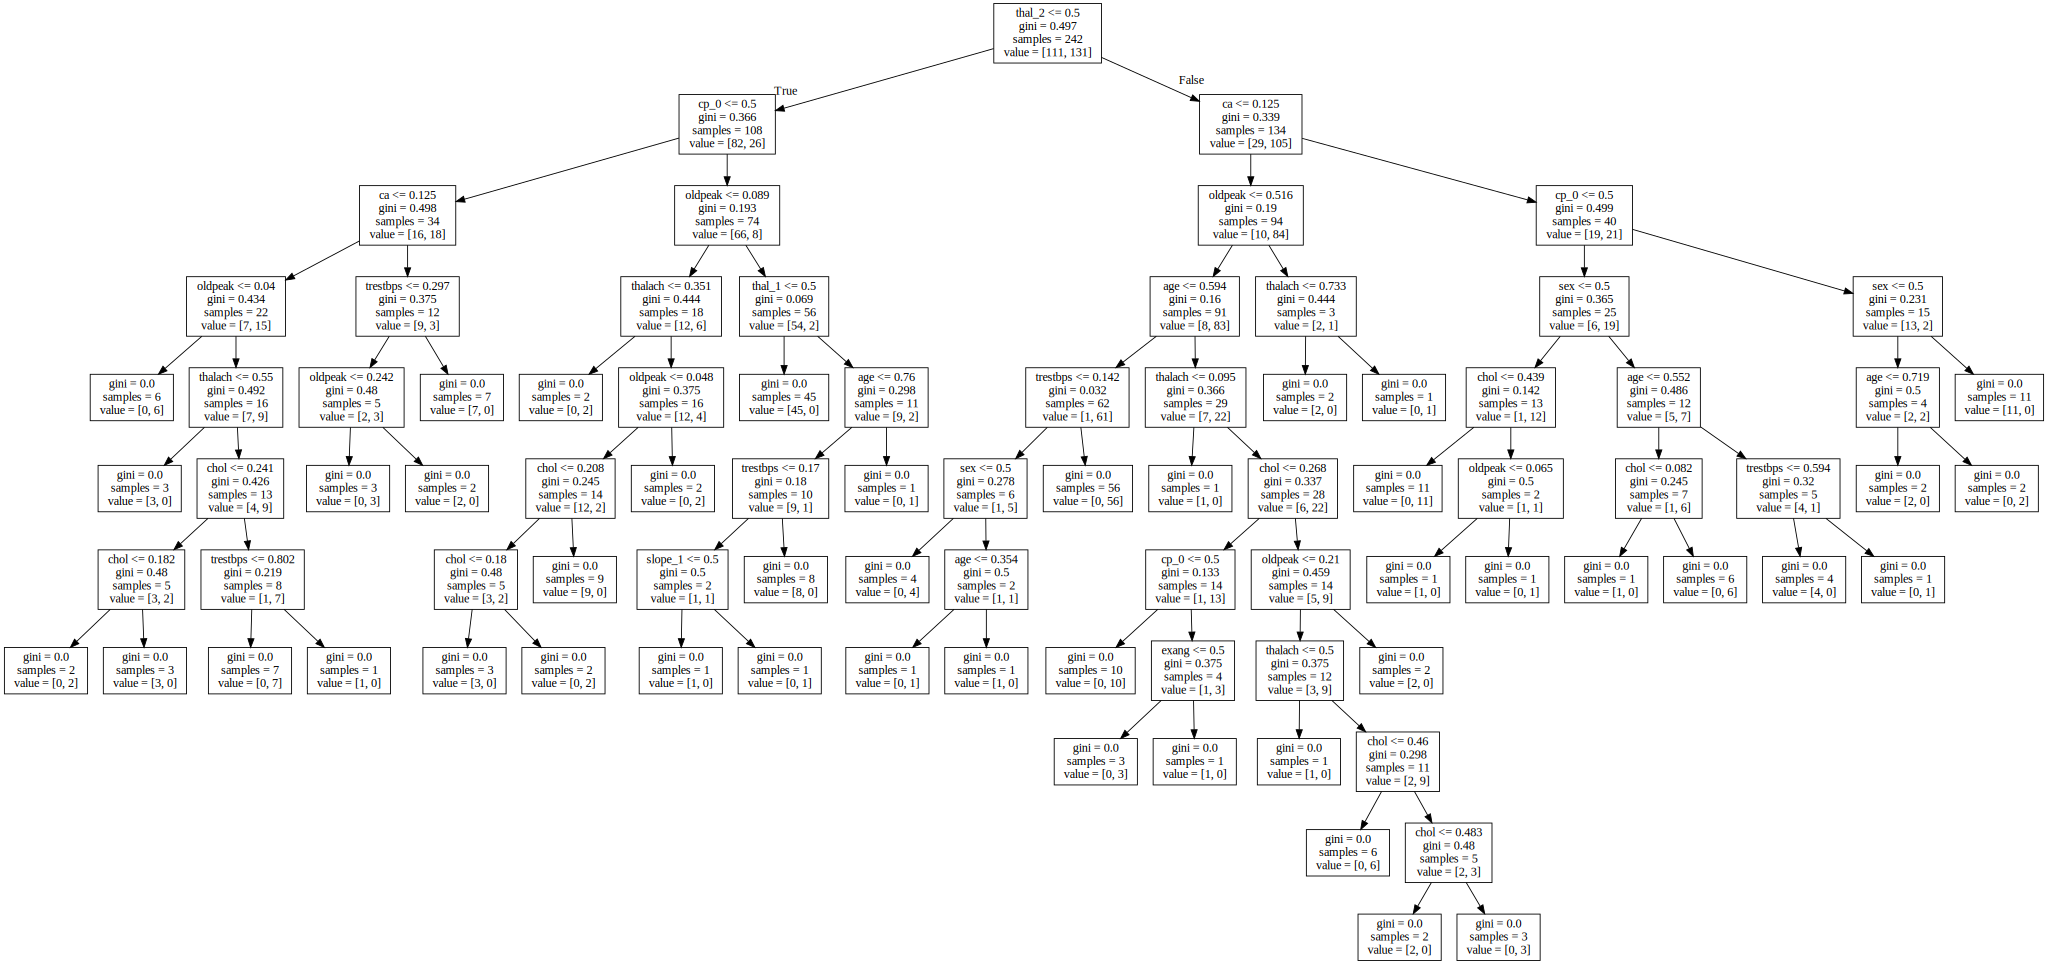

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(
    export_graphviz(
        dtc, out_file=None, feature_names=[x for x in df.columns if x != "target"]
    )
)
graph.format = "png"
graph

## Random Forest Classification

* Random forest is a supervised learning algorithm which is used for both classification as well as regression. 
* But however, it is mainly used for classification problems. 
* As we know that a forest is made up of trees and more trees means more robust forest. 
* Similarly, a random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. 
* It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train, y_train)

acc = rf.score(x_test, y_test) * 100
accuracies["Random Forest"] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


## Comparing Models

<Figure size 720x480 with 0 Axes>

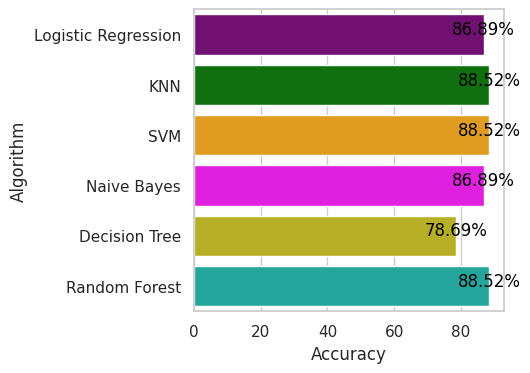

In [ ]:
colors = ["purple", "green", "orange", "magenta", "#CFC60E", "#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(dpi=120)
plt.figure(figsize=(4, 4))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Algorithm")
plt.xlabel("Accuracy")
g = sns.barplot(
    y=list(accuracies.keys()), x=list(accuracies.values()), palette=colors, orient="h"
)
i = 0
for algorithm, accuracy in accuracies.items():
    g.text(accuracy, i, "{0:.2f}%".format(accuracy), color="black", ha="center")
    i += 1
plt.show()

## Confusion Matrix
true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.

true negatives (TN): We predicted no, and they don't have the disease.

false positives (FP): We predicted yes, but they don't actually have the disease.

false negatives (FN): We predicted no, but they actually do have the disease. 

In [ ]:
# Predicted values
y_hat_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
y_hat_knn = knn3.predict(x_test)
y_hat_svm = svm.predict(x_test)
y_hat_nb = nb.predict(x_test)
y_hat_dtc = dtc.predict(x_test)
y_hat_rf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_hat_lr)
cm_knn = confusion_matrix(y_test, y_hat_knn)
cm_svm = confusion_matrix(y_test, y_hat_svm)
cm_nb = confusion_matrix(y_test, y_hat_nb)
cm_dtc = confusion_matrix(y_test, y_hat_dtc)
cm_rf = confusion_matrix(y_test, y_hat_rf)

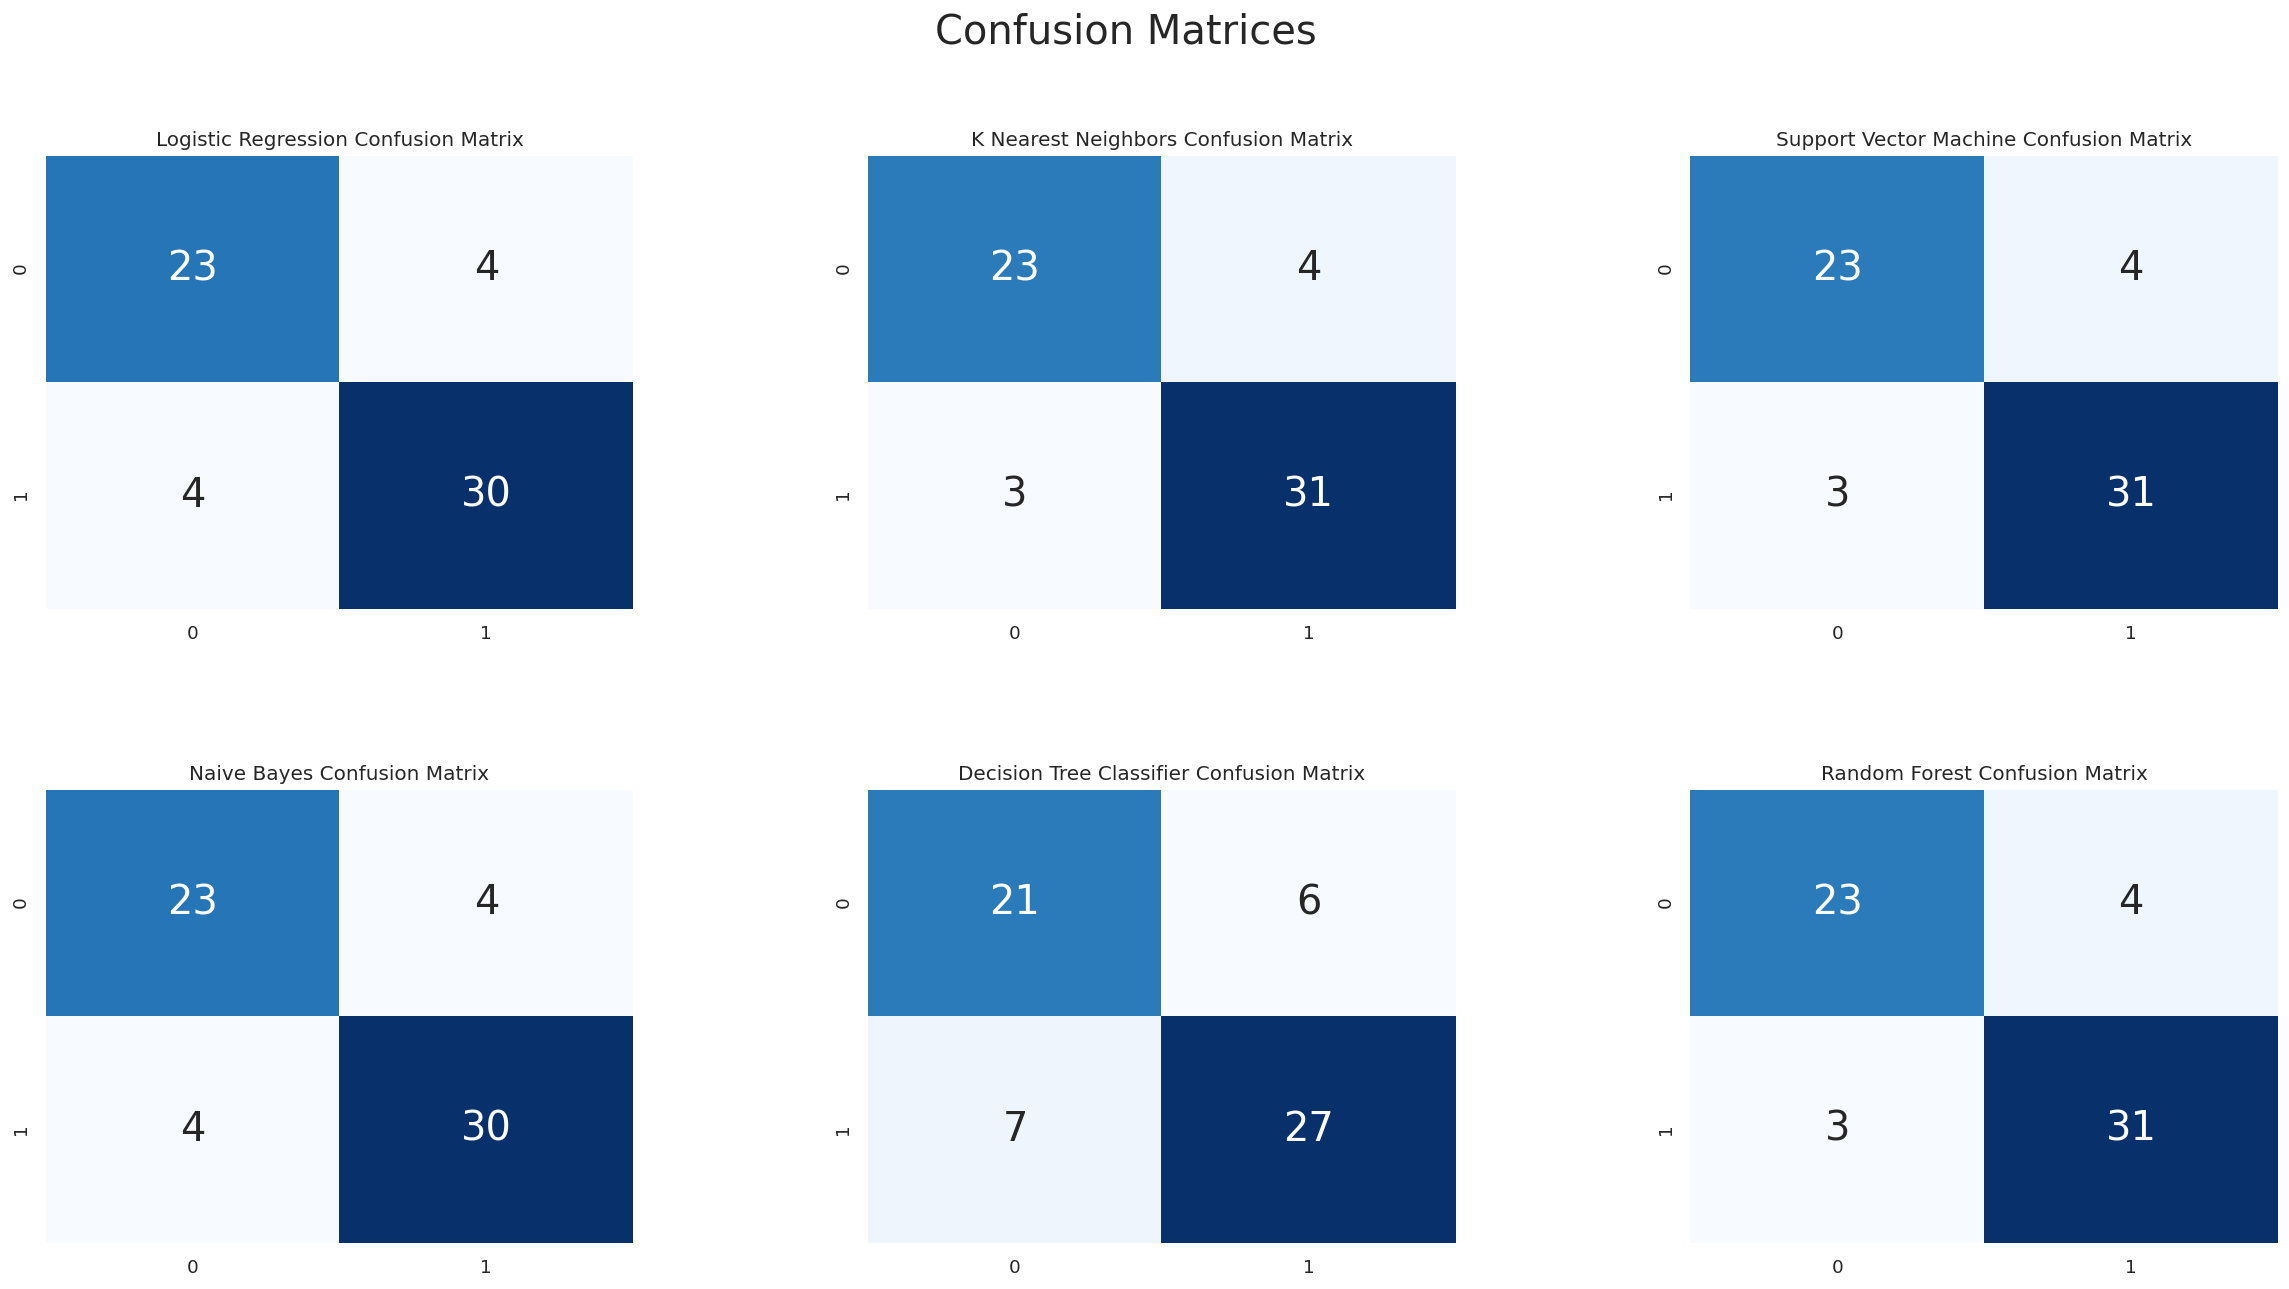

In [ ]:
plt.figure(figsize=(24, 12), dpi=120)

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 3, 1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(
    cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(
    cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(
    cm_svm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(
    cm_nb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(
    cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(
    cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.show()